##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Basic classification: Classify images of clothing

基本分類：對服裝圖片進行分類

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This guide trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

本指南訓練神經網絡模型來對運動鞋和襯衫等服裝圖像進行分類。 如果您不了解所有細節也沒關係； 這是對完整 TensorFlow 程序的快速概述，並在您進行過程中解釋了詳細信息。

本指南使用 [tf.keras](https://www.tensorflow.org/guide/keras)，這是一種用於在 TensorFlow 中構建和訓練模型的高級 API。

In [3]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.11.0


## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

本指南使用 [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) 數據集，其中包含 10 個類別的 70,000 張灰度圖像。 圖像以低分辨率（28 x 28 像素）顯示單件衣服，如下所示：

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and [load the Fashion MNIST data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) directly from TensorFlow:

Fashion MNIST 旨在替代經典 [MNIST](http://yann.lecun.com/exdb/mnist/) 數據集——通常用作計算機視覺機器學習程序的“Hello, World” . MNIST 數據集包含手寫數字（0、1、2 等）的圖像，其格式與您將在此處使用的衣服的格式相同。

本指南使用 Fashion MNIST 來實現多樣性，因為它是一個比常規 MNIST 更具挑戰性的問題。 這兩個數據集都相對較小，用於驗證算法是否按預期工作。 它們是測試和調試代碼的良好起點。

在這裡，60,000 張圖像用於訓練網絡，10,000 張圖像用於評估網絡學習分類圖像的準確程度。 您可以直接從 TensorFlow 訪問 Fashion MNIST。 直接從 TensorFlow 導入並[加載 Fashion MNIST 數據](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data)：

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

加載數據集會返回四個 NumPy 數組：

* `train_images` 和 `train_labels` 數組是*訓練集*——模型用來學習的數據。
* 該模型針對 *test set*、`test_images` 和 `test_labels` 數組進行了測試。

圖像是 28x28 NumPy 數組，像素值範圍從 0 到 255。*標籤* 是一個整數數組，範圍從 0 到 9。這些對應於圖像所代表的服裝的*類*：

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

每個圖像都映射到一個標籤。 由於 *class names* 不包含在數據集中，因此將它們存儲在此處以供稍後在繪製圖像時使用：

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

探索數據

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

讓我們在訓練模型之前探索數據集的格式。 下圖顯示訓練集中有 60,000 張圖像，每張圖像表示為 28 x 28 像素：

In [6]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

同樣，訓練集中有 60,000 個標籤：

In [7]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

每個標籤都是 0 到 9 之間的整數：

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

測試集中有 10,000 張圖像。 同樣，每個圖像都表示為 28 x 28 像素：

In [9]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

測試集包含 10,000 個圖像標籤：

In [10]:
len(test_labels)

10000

## Preprocess the data

預處理數據

在訓練網絡之前必須對數據進行預處理。 如果您檢查訓練集中的第一張圖像，您會看到像素值落在 0 到 255 的範圍內：

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

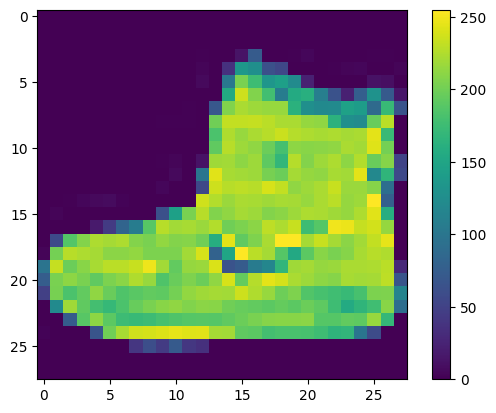

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

在將這些值提供給神經網絡模型之前，將這些值縮放到 0 到 1 的範圍內。 為此，請將值除以 255。重要的是，*訓練集* 和 *測試集* 以相同的方式進行預處理：

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

為了驗證數據的格式是否正確以及您是否已準備好構建和訓練網絡，讓我們顯示*訓練集*中的前 25 張圖像，並在每張圖像下方顯示類別名稱。

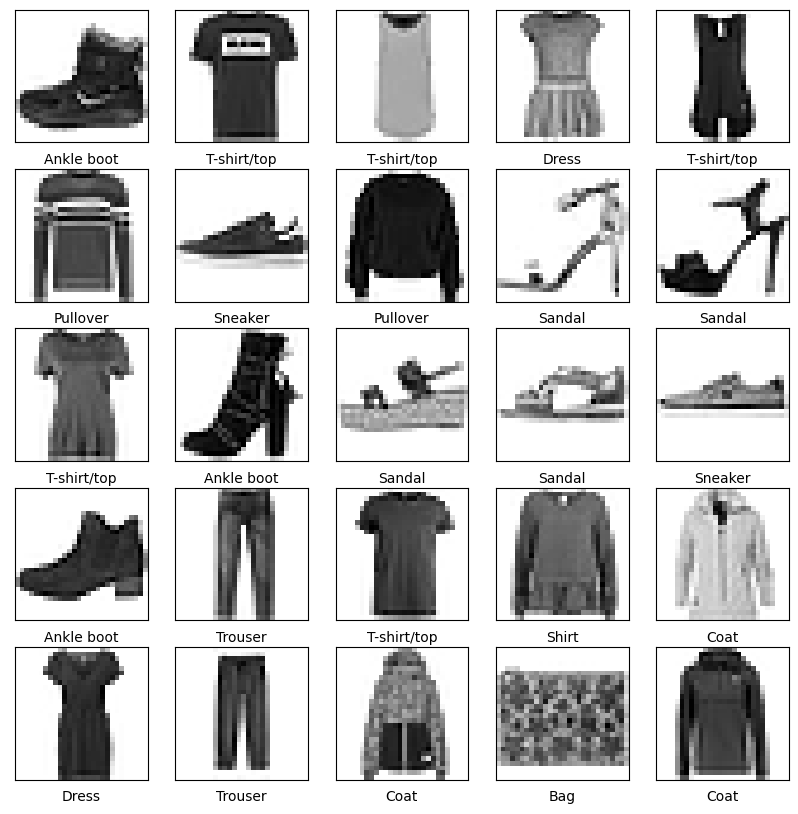

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

構建模型

構建神經網絡需要配置模型的層，然後編譯模型。

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

設置圖層

The basic building block of a neural network is the [*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.
神經網絡的基本構建塊是 [*層*](https://www.tensorflow.org/api_docs/python/tf/keras/layers)。 層從輸入它們的數據中提取表示。 希望這些表示對手頭的問題有意義。

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.
大多數深度學習都是將簡單的層鏈接在一起。 大多數層，例如“tf.keras.layers.Dense”，都有在訓練期間學習的參數。

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's [*compile*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) step:

* [*Loss function*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* [*Optimizer*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) —This is how the model is updated based on the data it sees and its loss function.
* [*Metrics*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

該網絡中的第一層“tf.keras.layers.Flatten”將圖像格式從二維數組（28 x 28 像素）轉換為一維數組（28 * 28 = 784 像素） ). 將此層視為圖像中像素行的拆分並將它們排列起來。 該層沒有要學習的參數； 它只會重新格式化數據。

像素變平後，網絡由兩個“tf.keras.layers.Dense”層組成。 這些是密集連接或完全連接的神經層。 第一個“密集”層有 128 個節點（或神經元）。 第二層（也是最後一層）返回一個長度為 10 的 logits 數組。每個節點都包含一個分數，表示當前圖像屬於 10 個類別之一。

### 編譯模型

在模型準備好進行訓練之前，還需要進行一些設置。 這些是在模型的 [*compile*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) 步驟中添加的：

* [*損失函數*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) — 這衡量模型在訓練過程中的準確性。 您希望最小化此函數以將模型“引導”到正確的方向。
* [*Optimizer*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) — 這就是模型根據它看到的數據及其損失函數進行更新的方式。
* [*Metrics*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) — 用於監控訓練和測試步驟。 以下示例使用 *accuracy*，即正確分類的圖像的分數。

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.

## 訓練模型

訓練神經網絡模型需要以下步驟：

1. 將訓練數據提供給模型。 在此示例中，訓練數據位於“train_images”和“train_labels”數組中。
2. 模型學習關聯圖像和標籤。
3. 您要求模型對測試集做出預測——在本例中為“test_images”數組。
4. 驗證預測是否與 `test_labels` 數組中的標籤相匹配。

### Feed the model

To start training,  call the [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method—so called because it "fits" the model to the training data:

### 給模型餵食

要開始訓練，請調用 [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) 方法——如此稱呼是因為它“使”模型適合訓練 數據：

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4994 - accuracy: 0.8259
Epoch 2/10
1875/1875 [==============================] - 2s 992us/step - loss: 0.3733 - accuracy: 0.8654
Epoch 3/10
1875/1875 [==============================] - 2s 990us/step - loss: 0.3366 - accuracy: 0.8768
Epoch 4/10
1875/1875 [==============================] - 2s 988us/step - loss: 0.3130 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2937 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 2s 996us/step - loss: 0.2804 - accuracy: 0.8954
Epoch 7/10
1875/1875 [==============================] - 2s 973us/step - loss: 0.2689 - accuracy: 0.8999
Epoch 8/10
1875/1875 [==============================] - 2s 990us/step - loss: 0.2565 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 2s 976us/step - loss: 0.2482 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 2s 993us/st

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

隨著模型的訓練，會顯示損失和準確性指標。 該模型在訓練數據上達到了大約 0.91（或 91%）的準確率。

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

### 評估準確性

接下來，比較模型在測試數據集上的表現：

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3348 - accuracy: 0.8824 - 237ms/epoch - 756us/step

Test accuracy: 0.8823999762535095


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:
*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

事實證明，測試數據集的準確性略低於訓練數據集的準確性。 訓練準確度和測試準確度之間的這種差距代表*過度擬合*。 當機器學習模型在新的、以前看不見的輸入上的表現比在訓練數據上的表現更差時，就會發生過度擬合。 過度擬合的模型會將訓練數據集中的噪聲和細節“記住”到一定程度，從而對模型在新數據上的性能產生負面影響。 有關詳細信息，請參閱以下內容：
* [演示過擬合](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
* [防止過擬合的策略](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### Make predictions

With the model trained, you can use it to make predictions about some images.
Attach a softmax layer to convert the model's linear outputs—[logits](https://developers.google.com/machine-learning/glossary#logits)—to probabilities, which should be easier to interpret.

### 作出預測

訓練好模型後，您可以使用它對某些圖像進行預測。
附加一個 softmax 層以將模型的線性輸出 -[logits](https://developers.google.com/machine-learning/glossary#logits) - 轉換為概率，這應該更容易解釋。

In [18]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 504us/step


Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

在這裡，模型已經預測了測試集中每個圖像的標籤。 我們先來看第一個預測：

In [20]:
predictions[0]

array([7.7210025e-08, 6.2531258e-11, 8.5378495e-08, 1.0174130e-10,
       1.4337825e-08, 1.9636579e-02, 4.6770955e-07, 7.4165821e-02,
       4.8568168e-06, 9.0619206e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

預測是一個包含 10 個數字的數組。 它們代表模特的“信心”，即圖像對應於 10 件不同服裝中的每一件。 您可以看到哪個標籤具有最高的置信度值：

In [21]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

因此，該模型最有信心這張圖片是踝靴，或“class_names[9]”。 檢查測試標籤表明此分類是正確的：

In [22]:
test_labels[0]

9

Graph this to look at the full set of 10 class predictions.

繪製此圖表以查看完整的 10 類預測集。

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

### 驗證預測

訓練好模型後，您可以使用它對某些圖像進行預測。

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

讓我們看看第 0 個圖像、預測和預測數組。 正確的預測標籤是藍色的，不正確的預測標籤是紅色的。 該數字給出了預測標籤的百分比（滿分 100）。

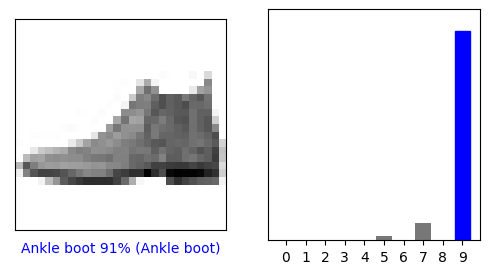

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

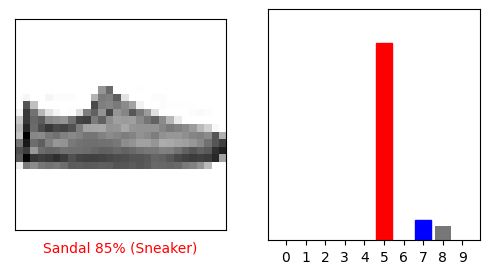

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

讓我們用他們的預測繪製幾幅圖像。 請注意，即使非常自信，模型也可能是錯誤的。

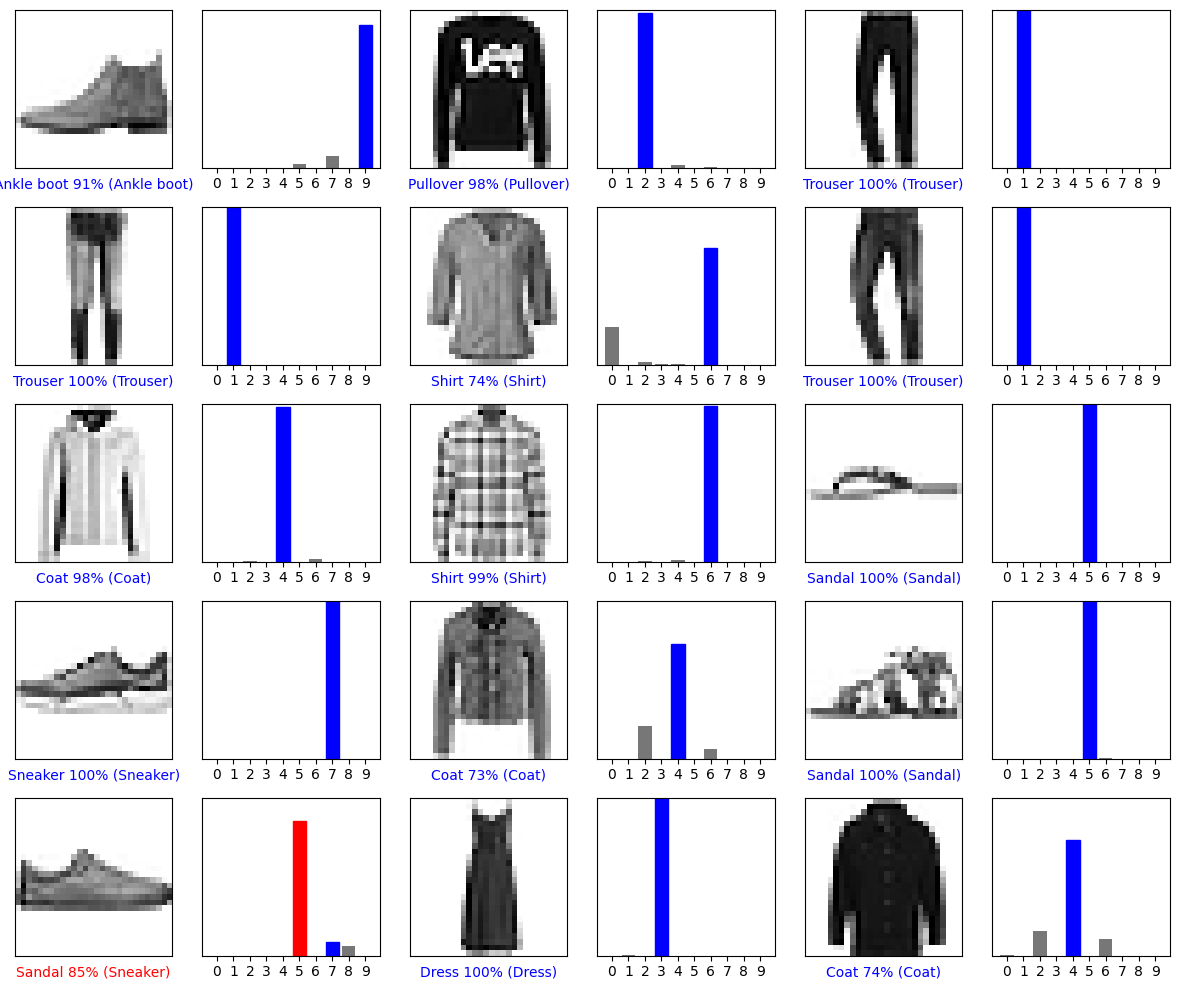

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

## 使用訓練好的模型

最後，使用訓練好的模型對單個圖像進行預測。

In [27]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

`tf.keras` 模型經過優化，可以一次對*批次*或示例集合進行預測。 因此，即使您使用的是單個圖像，也需要將其添加到列表中：

In [28]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

現在預測這張圖片的正確標籤：

In [29]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 12ms/step
[[8.8924891e-05 8.2111696e-12 9.8074645e-01 1.8826556e-07 1.6255509e-02
  2.0014939e-11 2.9088140e-03 3.7057484e-15 1.5001989e-08 9.0175771e-14]]


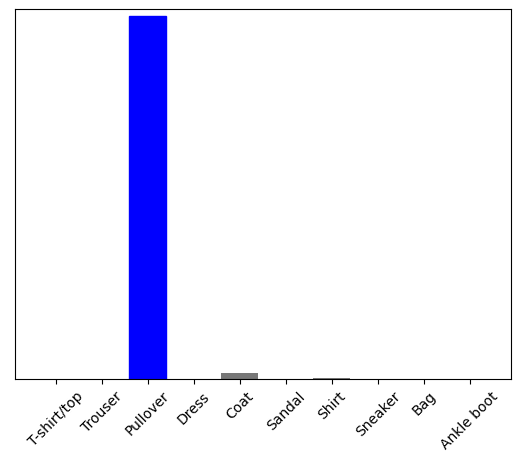

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

`tf.keras.Model.predict` 返回一個列表列表——一個列表對應一批數據中的每個圖像。 批量獲取我們（唯一）圖像的預測：

In [31]:
np.argmax(predictions_single[0])

2

And the model predicts a label as expected.

該模型按預期預測標籤。